# SAMPLE SUPERSTORE EDA

As a business manager, try to find out the weak areas where you can work to make more profit.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
store_data = pd.read_csv("C:\\Users\\arai2\\Downloads\\archive (1)\\SampleSuperstore.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [7]:
store_data.shape

(9994, 13)

In [8]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
store_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
store_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Analyzing the segments of the SampleSuperstore

In [37]:
store_data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

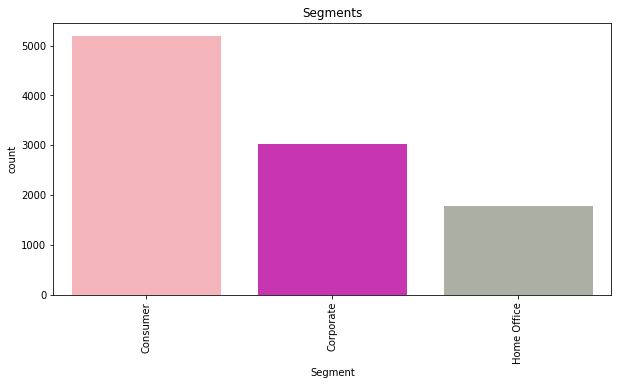

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Segment', data = store_data, palette= ["#ffaab1","#e11cc2", "#abb1a2"])
plt.title('Segments')
plt.xticks(rotation = 90);

In [14]:
store_data.Sales.max()

22638.48

In [15]:
store_data.Profit.max()

8399.976

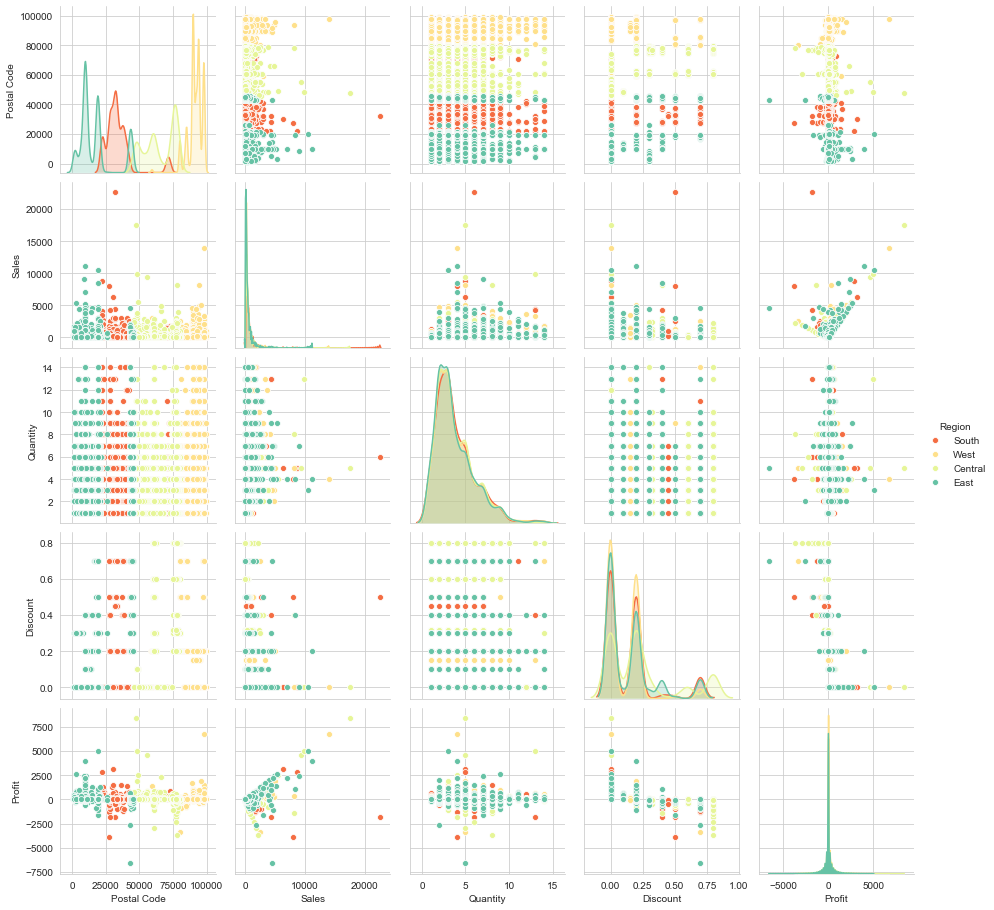

In [16]:
sns.set_style("whitegrid")
sns.pairplot(store_data,hue="Region",palette='Spectral')

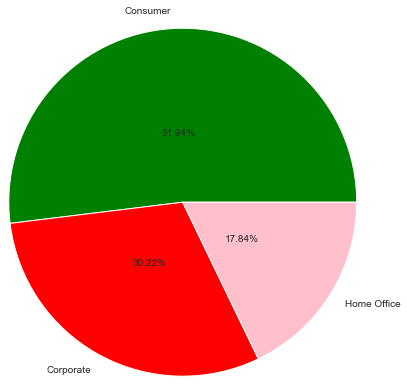

In [17]:
plt.pie(list(store_data['Segment'].value_counts()),labels = list(store_data['Segment'].value_counts().keys()), radius =2,autopct = '%0.2f%%',pctdistance=0.4,colors=['green','red','pink'])
plt.show()

# Checking for the most popular category among all product categories

In [18]:
store_data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# Count Plots for various Categories vs Region

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

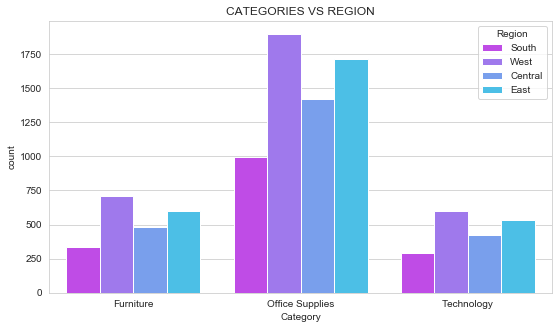

In [19]:
plt.figure(figsize=(9,5))
plt.title('CATEGORIES VS REGION')
sns.countplot(x=store_data['Category'],hue=store_data['Region'],palette='cool_r')
plt.xticks()

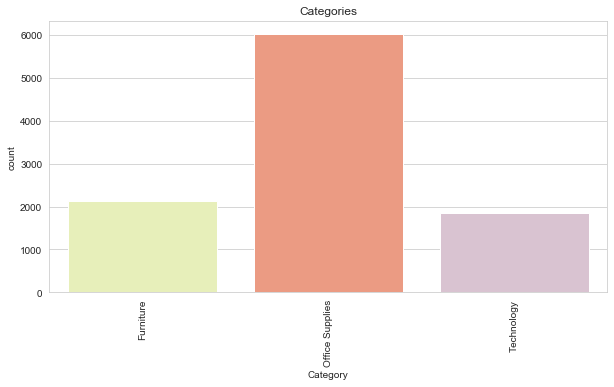

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Category', data = store_data, palette= ["#edf8b1","#fc9272", "#dcc0d2"])
plt.title('Categories')
plt.xticks(rotation = 90);

In [21]:
store_data.rename(columns = {'Sub-Category':'SubCategory'}, inplace = True)

In [22]:
store_data.SubCategory.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: SubCategory, dtype: int64

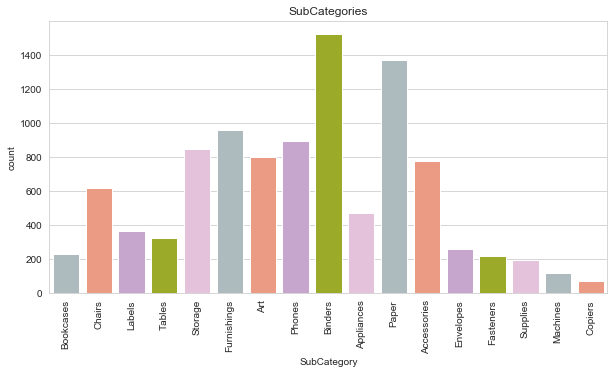

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'SubCategory', data = store_data, palette= ["#aabbc1","#fc9272", "#caa0d2",'#abc012','#eabcde'])
plt.title('SubCategories')
plt.xticks(rotation = 90);

In [24]:
office_store_data = store_data[store_data['Category']=='Office Supplies']
office_store_data = office_store_data[~office_store_data['SubCategory'].isin(['Supplies','Accessories'])]
office_store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700


In [25]:
office_store_subcat_data  = office_store_data.sort_values("SubCategory",ascending=False)
office_store_subcat_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
4161,Standard Class,Consumer,United States,New York City,New York,10035,East,Office Supplies,Storage,22.58,2,0.0,5.8708
7961,Second Class,Corporate,United States,Miramar,Florida,33023,South,Office Supplies,Storage,81.36,5,0.2,-19.3230
5476,First Class,Home Office,United States,Maple Grove,Minnesota,55369,Central,Office Supplies,Storage,84.55,5,0.0,22.8285
8028,Second Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,772.68,4,0.0,108.1752
8026,Second Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,78.80,1,0.0,1.5760


In [26]:
office_store_subcat_data.SubCategory.value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Name: SubCategory, dtype: int64

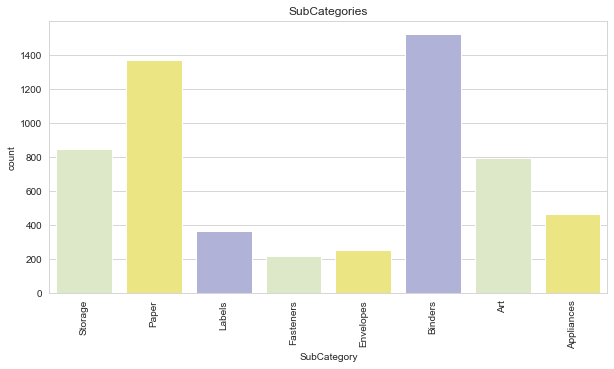

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'SubCategory', data = office_store_subcat_data, palette= ["#ddeec1","#fcf572",'#aaacde'])
plt.title('SubCategories')
plt.xticks(rotation = 90);

In [28]:
sum(office_store_data['Sales'])

672373.4940000033

In [29]:
office_store_subcat_binders_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Binders']
sum(office_store_subcat_binders_data['Sales'])

203412.73299999995

In [30]:
office_store_subcat_paper_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Paper']
sum(office_store_subcat_paper_data['Sales'])

78479.2060000001

In [31]:
office_store_subcat_storage_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Storage']
sum(office_store_subcat_storage_data['Sales'])

223843.60800000004

In [32]:
sum(office_store_data['Profit'])

123679.90030000015

# Conclusion

--> Office Supplies is the most ordered Category.

--> Binders is the most ordered SubCategory from the Office Supplies Category.

--> West Region is analyzed to be the country region placing maximum orders/purchases.

--> Consumer Segement has the highest count of orders/purchases(approx 52% purchase ratio).

--> Technology is the least purchased/ordered category. Hence, the store should make an effort of either imprivng the overall tech Inventory or prepare a business schemes of provision of discounts/offers on tech based purchases.

--> South Region has been the region where the least orders/purchases were carried out. To ensure a better purchase/ retail down South, the SuperStore must either set up branches down South region or should open up an online site which deals with Region based purchases.

--> Geographic Departmentation will be instrumental for improving the overall reach to the people of USA.